In [1]:
import sys

sys.path.append('.')

import model

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

This time, run the model with no contact tracing at all.

In [3]:
N = 2000
K = 4
p_star = 0.256

In [4]:
def ws_case_generator(N, K, p_star):
    def wscg(**kwargs):
        return model.watts_strogatz_case_p_star(N, K, p_star, **kwargs)
    
    return wscg

In [5]:
## Population parameters:
base_params = {
    # Node parameter
    'A' : 0.2, # This is A* from the second study.
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0, ## all edges can be traced.
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

In [6]:
conditions = {
    'q-0.000' : {'C' : model.q_knockout(0.0), 'q' : 0.0},
    'q-0.100' : {'C' : model.q_knockout(0.1), 'q' : 0.1},
    'q-0.200' : {'C' : model.q_knockout(0.2), 'q' : 0.2},
    'q-0.300' : {'C' : model.q_knockout(0.3), 'q' : 0.3},
    'q-0.400' : {'C' : model.q_knockout(0.4), 'q' : 0.4},
    'q-0.500' : {'C' : model.q_knockout(0.5), 'q' : 0.5},
    'q-0.600' : {'C' : model.q_knockout(0.6), 'q' : 0.6},
    'q-0.700' : {'C' : model.q_knockout(0.7), 'q' : 0.7},
    'q-0.800' : {'C' : model.q_knockout(0.8), 'q' : 0.8},
    'q-0.900' : {'C' : model.q_knockout(0.9), 'q' : 0.9},
    'q-1.000' : {'C' : model.q_knockout(1.0), 'q' : 1.0},
}

In [7]:
def dfr(rs):
    return pd.DataFrame(
        [r for case in rs 
         for r in model.data_from_results(rs, case)])

In [8]:
runs = 350
base_params['A'] = 0.3

rs = model.experiment(
    ws_case_generator(N, K, p_star),
    base_params,
    conditions,
    runs)

temp = dfr(rs)
temp.to_csv('q_study_0_3.csv')
#del rs

Starting q-0.000
Initializing input graphs
graphs prepared in 15.639006299999892
Finished q-0.000 in 957.4888601040002
Starting q-0.100
Initializing input graphs
graphs prepared in 28.245381666998583
Finished q-0.100 in 1298.7003880340017
Starting q-0.200
Initializing input graphs
graphs prepared in 26.28247280099822
Finished q-0.200 in 1435.8121137740018
Starting q-0.300
Initializing input graphs
graphs prepared in 24.6346721359987
Finished q-0.300 in 1273.2292619569998
Starting q-0.400
Initializing input graphs
graphs prepared in 19.34282687800078
Finished q-0.400 in 1182.2522492140015
Starting q-0.500
Initializing input graphs
graphs prepared in 13.740452597001422
Finished q-0.500 in 729.3779543819983
Starting q-0.600
Initializing input graphs
graphs prepared in 13.069673388999945
Finished q-0.600 in 655.7753325430022
Starting q-0.700
Initializing input graphs
graphs prepared in 13.055601744999876
Finished q-0.700 in 725.5880045729973
Starting q-0.800
Initializing input graphs
graph

In [9]:
temp

,time,A,W,C,beta_hat,alpha,gamma,zeta,limit,q,N,K,p,s_final,route_adjacent_ratio,traced_edges,traced_edges_distant,case,infected_ratio
0,14,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1993,0.333333,269,0,q-0.000,0.0035
1,247,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1366,0.672986,299,0,q-0.000,0.3170
2,218,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,926,0.681267,280,0,q-0.000,0.5370
3,2,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1998,1.000000,269,0,q-0.000,0.0010
4,8,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1995,1.000000,269,0,q-0.000,0.0025
5,39,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1990,0.666667,291,0,q-0.000,0.0050
6,18,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1997,0.500000,272,0,q-0.000,0.0015
7,2,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1998,1.000000,277,0,q-0.000,0.0010
8,1,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1999,NaN,258,0,q-0.000,0.0005
9,21,0.3,0.5,None,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1993,0.833333,280,0,q-0.000,0.0035


In [10]:
temp = pd.read_csv('q_study_0_3.csv')

In [11]:
temp

,Unnamed: 0,time,A,W,C,beta_hat,alpha,gamma,zeta,limit,q,N,K,p,s_final,route_adjacent_ratio,traced_edges,traced_edges_distant,case,infected_ratio
0,0,14,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1993,0.333333,269,0,q-0.000,0.0035
1,1,247,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1366,0.672986,299,0,q-0.000,0.3170
2,2,218,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,926,0.681267,280,0,q-0.000,0.5370
3,3,2,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1998,1.000000,269,0,q-0.000,0.0010
4,4,8,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1995,1.000000,269,0,q-0.000,0.0025
5,5,39,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1990,0.666667,291,0,q-0.000,0.0050
6,6,18,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1997,0.500000,272,0,q-0.000,0.0015
7,7,2,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1998,1.000000,277,0,q-0.000,0.0010
8,8,1,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1999,NaN,258,0,q-0.000,0.0005
9,9,21,0.3,0.5,NaN,0.4,0.25,0.1,0.1,10,0.0,2000,4,0.256,1993,0.833333,280,0,q-0.000,0.0035


In [12]:
temp['traced_edges_close'] = temp['traced_edges'] - temp['traced_edges_distant']

In [13]:
temp['traced_edges_close_ratio'] = temp['traced_edges_close'] /temp['traced_edges']

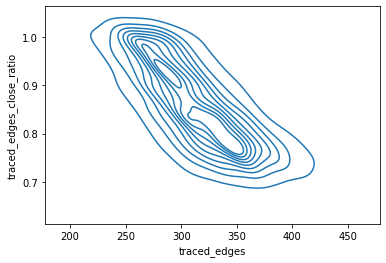

In [14]:
sns.kdeplot(
    data=temp,
    x = 'traced_edges',
    y = 'traced_edges_close_ratio',
)

In [15]:
temp_1 = temp.groupby(["traced_edges","traced_edges_close_ratio"])["infected_ratio"].mean().reset_index().pivot("traced_edges", "traced_edges_close_ratio", "infected_ratio")

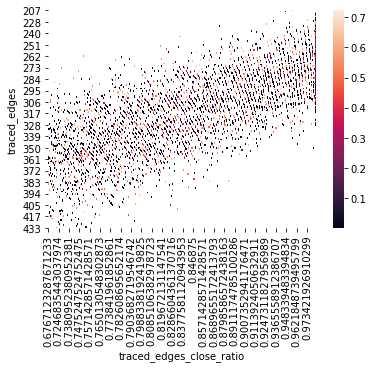

In [16]:
sns.heatmap(temp_1)

In [17]:
del rs
del temp
del temp_1

In [18]:
runs = 300

base_params['A'] = 0.5

rs = model.experiment(
    ws_case_generator(N, K, p_star),
    base_params,
    conditions,
    runs)

dfr(rs).to_csv('q_study_0_5.csv')
del rs

Starting q-0.000
Initializing input graphs
graphs prepared in 12.130412425998657
Finished q-0.000 in 708.2823660100039
Starting q-0.100
Initializing input graphs
graphs prepared in 12.054705313996237
Finished q-0.100 in 793.670375862006
Starting q-0.200
Initializing input graphs
graphs prepared in 13.076242508999712
Finished q-0.200 in 773.220515371002
Starting q-0.300
Initializing input graphs
graphs prepared in 14.539815611999074
Finished q-0.300 in 591.3919001110044
Starting q-0.400
Initializing input graphs
graphs prepared in 11.426508504002413
Finished q-0.400 in 552.8668318369964
Starting q-0.500
Initializing input graphs
graphs prepared in 11.350949969004432
Finished q-0.500 in 539.5867131180057
Starting q-0.600
Initializing input graphs
graphs prepared in 11.033713383003487
Finished q-0.600 in 568.2658885329947
Starting q-0.700
Initializing input graphs
graphs prepared in 11.546192669993616
Finished q-0.700 in 513.8165556719978
Starting q-0.800
Initializing input graphs
graphs 

In [19]:
runs = 200

base_params['A'] = 0.7

rs = model.experiment(
    ws_case_generator(N, K, p_star),
    base_params,
    conditions,
    runs)

dfr(rs).to_csv('q_study_0_7.csv')
del rs

Starting q-0.000
Initializing input graphs
graphs prepared in 7.515856514997722
Finished q-0.000 in 379.02841541400267
Starting q-0.100
Initializing input graphs
graphs prepared in 10.063100835999649
Finished q-0.100 in 360.2007606749976
Starting q-0.200
Initializing input graphs
graphs prepared in 7.449656215998402
Finished q-0.200 in 284.0975732969964
Starting q-0.300
Initializing input graphs
graphs prepared in 7.482503844999883
Finished q-0.300 in 230.61161942199396
Starting q-0.400
Initializing input graphs
graphs prepared in 7.509445048002817
Finished q-0.400 in 245.63247503999446
Starting q-0.500
Initializing input graphs
graphs prepared in 7.607335192995379
Finished q-0.500 in 214.05417126700195
Starting q-0.600
Initializing input graphs
graphs prepared in 7.46490484700189
Finished q-0.600 in 204.8595961999963
Starting q-0.700
Initializing input graphs
graphs prepared in 7.589735320994805
Finished q-0.700 in 234.0266371980033
Starting q-0.800
Initializing input graphs
graphs pr

In [20]:
runs = 100

base_params['A'] = 0.9

rs = model.experiment(
    ws_case_generator(N, K, p_star),
    base_params,
    conditions,
    runs)

dfr(rs).to_csv('q_study_0_9.csv')
del rs

Starting q-0.000
Initializing input graphs
graphs prepared in 3.6768244490012876
Finished q-0.000 in 102.79541939099727
Starting q-0.100
Initializing input graphs
graphs prepared in 3.7719992589991307
Finished q-0.100 in 86.1725971679989
Starting q-0.200
Initializing input graphs
graphs prepared in 5.800545268997666
Finished q-0.200 in 92.75882109999657
Starting q-0.300
Initializing input graphs
graphs prepared in 5.1229924310027855
Finished q-0.300 in 102.04528520000167
Starting q-0.400
Initializing input graphs
graphs prepared in 4.4669905780028785
Finished q-0.400 in 101.27807709100307
Starting q-0.500
Initializing input graphs
graphs prepared in 4.010139797006559
Finished q-0.500 in 86.37266264900245
Starting q-0.600
Initializing input graphs
graphs prepared in 4.975195952996728
Finished q-0.600 in 87.65605658099958
Starting q-0.700
Initializing input graphs
graphs prepared in 3.794943336994038
Finished q-0.700 in 61.4337936669981
Starting q-0.800
Initializing input graphs
graphs p

In [21]:
data = pd.concat([
    pd.read_csv('q_study_0_3.csv'),
    pd.read_csv('q_study_0_5.csv'),
    pd.read_csv('q_study_0_7.csv'),
    pd.read_csv('q_study_0_9.csv')
])

[Text(0, 0.5, 'average final infected ratio'), Text(0.5, 0, 'q rate')]

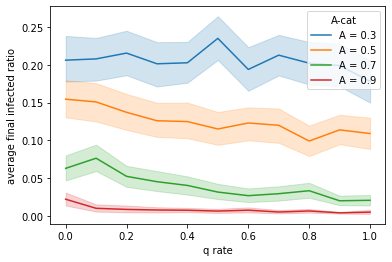

In [22]:
data["A-cat"] = data["A"].apply(lambda x: f"A = {x}")


splot = sns.lineplot(x='q', y='infected_ratio', hue="A-cat", data=data)

splot.set(#xscale="log",
          xlabel='q rate',
          ylabel='average final infected ratio')

In [23]:
data.to_csv('q_study_2020-10-01_four_A_classes.csv')

In [24]:
epidemic_size

NameError: name 'epidemic_size' is not defined

In [ ]:
ax = plt.plot(list(epidemic_size.keys()),
              list(epidemic_size.values()),
              'x-'
        )

#plt.xscale('log')
plt.xlabel('q')
plt.ylabel('average final infected ratio')

In [ ]:
def data_from_result(results, case):
    return [(r[1],
             {
                 "case" : case,
                 "q" : r[1]['q'],
                  "time" : r[0],
                  "s_final" : r[4][-1]
             }) 
            for r
            in results[case]]

def data_from_all_results(results):
    return [r for case in results for r in data_from_result(results, case)]

data = data_from_all_results(results)

data

In [ ]:
data_x = [r[1]['q'] for r in data]
data_y = [(N - r[1]['s_final']) / N for r in data]

df = pd.DataFrame(data = {"q" : data_x, "s_final" : data_y})

In [ ]:
df['log-q'] = np.log1p(df['q'])

In [ ]:
df['log-q']

In [ ]:
splot = sns.lineplot(x='q', y='s_final', data=df)
splot.set(#xscale="log",
          xlabel='q rate',
          ylabel='average final infected ratio')

## Finding the inflection point

Trying to find the inflection point. (What if there isn't one?)

In [ ]:
x = np.array(list(epidemic_size.keys()))

In [ ]:
y = np.array(list(epidemic_size.values()))

In [ ]:
df1 = np.gradient(y,
            x,
            edge_order = 1)

In [ ]:
np.gradient(df1, x, edge_order = 1)

In [ ]:
x[np.argsort(df1)]

In [ ]:
model.inflection_point(np.array(list(epidemic_size.keys())),
                  np.array(list(epidemic_size.values())))

In [ ]:
plt.plot(x, y)


In [ ]:
plt.plot(x, df1)
